### Ejercicios Repaso Primer Parcial Matematicas Avanzadas para ciencia de datos
#### 12 Septiembre - 6 Octubre 2022
##### Michael Adolfo Huerta Ramírez
- Intrucciones: 
La siguiente es una lista de ejercicios para prepararse para
el primer parcial. Los ejercicios son sacados del libro; Linear programming and
network flows-Wiley, de Bazaraa.
1. Problemas; 3.1, 3.2, 3.4, 3.6, 3.7, 3.9, 3.10, 3.11, 3.20, 3.21, 3.22, 3.23, 3.24,3.29, 3.40, 3.41, 3.48 (Python)

1.-
Maximizar $x₁ + 3x₂$ 
sujeto a las restricciones
<br>
$-x₁ + x₂ ≤ 4$
<br>
$-x₁ + 2x₂ ≤ 12$
<br>
$x₁ + x₂ ≤ 10$
<br>
$x₁ ≥ 0$
<br>
$x₂ ≥ 0$


a. Sketch the feasible region in the (x^, Xj) space and identify the optimal
solution.


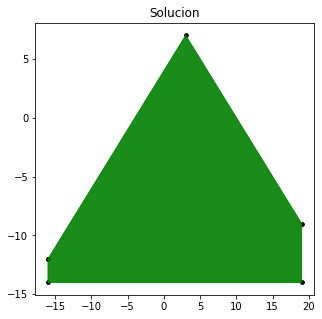

In [71]:

from intvalpy import lineqs
import numpy as np

A = -np.array([[-1, 1],
               [-1, 2],
               [1, 1]])
b = -np.array([4, 12, 10])



vertices1 = lineqs(A, b, title='Solucion', color='green', alpha=0.9, s=14, size=(5,5), save=False, show=True)


b.-Identify all the extreme points and reformulate the problem in terms of
the convex combinations of the extreme points. Solve the resulting
problem.

In [1]:
#las 3 posiciones extra en el arreglo ya incluye los valores de pivoteo}

c = [1, 3, 0, 0, 0]
#aqui se incluyen los valores de pivoteo
A = [
    [-1, 1, 1, 0, 0],
    [ -1, 2, 0, 1, 0],
    [ 1, 1, 0, 0, 1]
]
#se muestran los valores para despues de la desigualdad
b = [4, 12, 10]

In [2]:
def to_tableau(c, A, b):
    #introduce el valor a utilizar
    xb = [eq + [x] for eq, x in zip(A, b)]
    print(xb)
    z = c + [0]
    print(z)
    return xb + [z]

In [3]:
#unimos el valor resultante de la desigualdad donde corresponse, para poder iterarlo más adelante
to_tableau(c,A,b)

[[-1, 1, 1, 0, 0, 4], [-1, 2, 0, 1, 0, 12], [1, 1, 0, 0, 1, 10]]
[1, 3, 0, 0, 0, 0]


[[-1, 1, 1, 0, 0, 4],
 [-1, 2, 0, 1, 0, 12],
 [1, 1, 0, 0, 1, 10],
 [1, 3, 0, 0, 0, 0]]

En esta parte los acomodamos en un arreglo unico cada una de las restricciones

In [4]:
def can_be_improved(tabla):
    z = tabla[-1]
    
    return any(x > 0 for x in z[:-1])

In [5]:
import math
import numpy as np

def get_pivot_position(tabla):
    z = tabla[-1]
    column = next(i for i, x in enumerate(z[:-1]) if x > 0)
    
    restrictions = []
    for eq in tabla[:-1]:
        el = eq[column]
        restrictions.append(math.inf if el <= 0 else eq[-1] / el)

    row = restrictions.index(min(restrictions))
    return row, column

In [6]:
def pivot_step(tabla, pivot_position):
    nueva_tabla = [[] for eq in tabla]
    
    i, j = pivot_position
    pivot_value = tabla[i][j]
    nueva_tabla[i] = np.array(tabla[i]) / pivot_value
    
    for eq_i, eq in enumerate(tabla):
        if eq_i != i:
            #aqui se pone el multiplicador de cada uno de los pasos de pivoteo
            multiplicador = np.array(nueva_tabla[i]) * tabla[eq_i][j]
            nueva_tabla[eq_i] = np.array(tabla[eq_i]) - multiplicador
   
    return nueva_tabla

In [7]:
def is_basic(columna):
    return sum(columna) == 1 and len([c for c in columna if c == 0]) == len(columna) - 1

def get_solution(tabla):
    columns = np.array(tabla).T
    soluciones = []
    for column in columns:
        solucion = 0
        if is_basic(column):
            one_index = column.tolist().index(1)
            solucion = columns[-1][one_index]
        soluciones.append(solucion)
        
    return soluciones

In [8]:
def simplex(c, A, b):
    tabla = to_tableau(c, A, b)

    while can_be_improved(tabla):
        pivot_position = get_pivot_position(tabla)
        tabla = pivot_step(tabla, pivot_position)

    return get_solution(tabla)

In [9]:
solution = simplex(c, A, b)
print('Solucion: ', solution)

[[-1, 1, 1, 0, 0, 4], [-1, 2, 0, 1, 0, 12], [1, 1, 0, 0, 1, 10]]
[1, 3, 0, 0, 0, 0]
Solucion:  [3.0, 7.0, 0, 1.0, 0, 0]


In [19]:
##pip install intvalpy

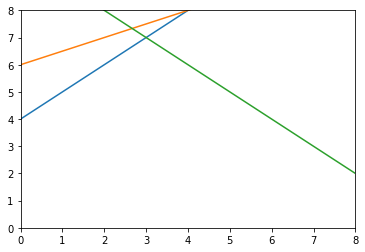

In [69]:


import numpy as np
import matplotlib.pyplot as plt

# Construct lines
# x > 0
x = np.linspace(0, 8)
# -x + y = 4
y1 = (x) + 4
# -x + 2y = 12
y2 = (12+x)/2.0
# x + y = 10 
y3 = (-x+10)

plt.xlim((0, 8))
plt.ylim((0, 8))

# Make plot
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)





c.- Suppose that the third constraint is dropped. Identify the extreme points
and directions and reformulate the problem in terms of convex 
combinations of the extreme points and linear combinations of the extreme
directions. Solve the resulting problem, identify the optimal solution of
the original problem, and interpret the solution.